<a href="https://colab.research.google.com/github/torotoro21/GLAUCOMA-DETECTION/blob/ILHAM/Experiment_Hyperparameter_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect Google Drive
from google.colab import drive

In [2]:
#Akses Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Library
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from keras import backend as K
from imutils import paths
from keras.layers import Dropout
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

In [4]:
import numpy as np
from imutils import paths
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from google.colab import drive
import zipfile
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
img_paths = '/content/drive/MyDrive/dataset/Glaukoma.zip'
zip_ref = zipfile.ZipFile(img_paths, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [6]:
image_paths=paths.list_images("/content/Glaukoma")
gambar = []
label = []

In [7]:
from sklearn import preprocessing
for images in image_paths:
  image = Image.open(images)
  image = image.convert('RGB')
  image = np.array(image.resize((224,224))) / 255.0

  gambar.append(image)
  labels=images.split(os.path.sep)[-2]
  label.append(labels)

In [8]:
labels_train_unique = np.unique(np.array(label))

In [9]:
temp = np.array(gambar)
print(temp.shape)

(1181, 224, 224, 3)


In [10]:
temp2=np.array(label)
print(temp2.shape)
print(label)

(1181,)
['normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', '

In [11]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
label = lb.fit_transform(label)
print(label)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np.array(gambar), np.array(label), test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(944, 224, 224, 3)
(237, 224, 224, 3)
(944, 1)
(237, 1)


In [13]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from tensorflow.keras import layers, optimizers, regularizers
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import RMSprop

In [14]:
def fit_second_model(x_train, y_train, x_test, y_test, bs):
    model = Sequential()
    model.add(Conv2D(96, kernel_size=(3,3), strides= 4, padding= 'same', activation= 'relu', input_shape= (224,224,3), kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))

    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=bs, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Batch Size='+str(bs))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
15/15 [==============================] - 13s 187ms/step - loss: 0.9695 - accuracy: 0.6081 - val_loss: 0.6317 - val_accuracy: 0.6878
Epoch 2/50
15/15 [==============================] - 1s 91ms/step - loss: 0.6464 - accuracy: 0.6314 - val_loss: 0.5930 - val_accuracy: 0.6878
Epoch 3/50
15/15 [==============================] - 1s 91ms/step - loss: 0.6330 - accuracy: 0.6663 - val_loss: 0.5776 - val_accuracy: 0.7131
Epoch 4/50
15/15 [==============================] - 1s 90ms/step - loss: 0.5567 - accuracy: 0.7108 - val_loss: 0.4795 - val_accuracy: 0.7806
Epoch 5/50
15/15 [==============================] - 1s 91ms/step - loss: 0.4855 - accuracy: 0.7648 - val_loss: 0.5069 - val_accuracy: 0.7468
Epoch 6/50
15/15 [==============================] - 1s 91ms/step - loss: 0.4223 - accuracy: 0.8114 - val_loss: 0.3937 - val_accuracy: 0.8312
Epoch 7/50
15/15 [==============================] - 1s 91ms/step - loss: 0.3513 - accuracy: 0.8443 - val_loss: 0.3639 - val_accuracy: 0.8312
Epoch 8/50


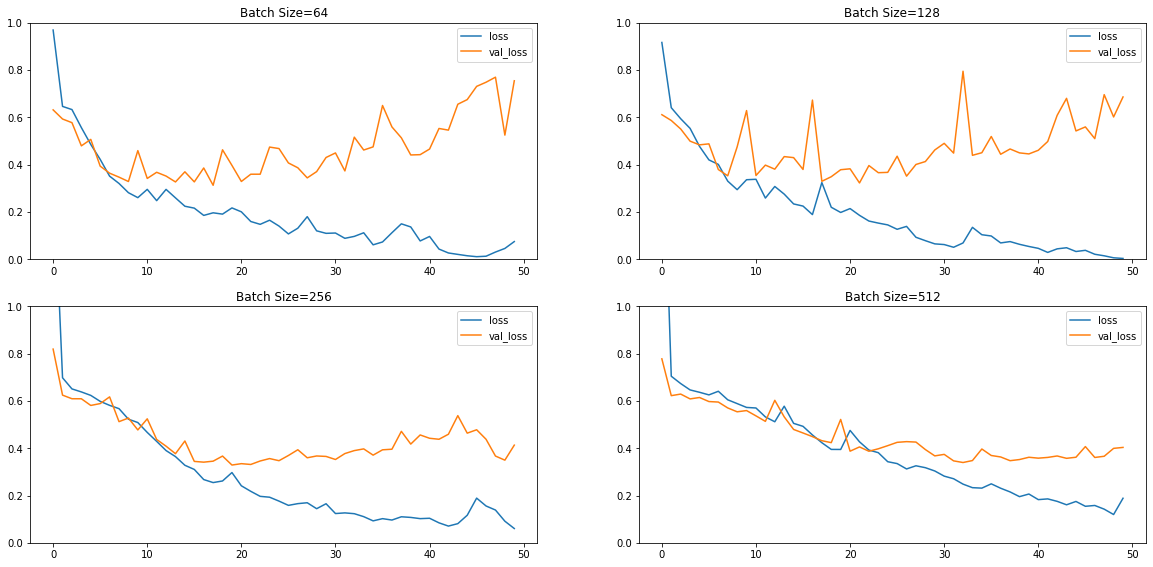

In [15]:
batch_size = [64, 128,256, 512]


plt.figure(figsize=(20, 20))
for i in range(len(batch_size)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, batch_size[i])

# show learning curves
plt.show()

In [14]:
def fit_second_model(x_train, y_train, x_test, y_test, bs):
    model = Sequential()
    model.add(Conv2D(96, kernel_size=(3,3), strides= 4, padding= 'same', activation= 'relu', input_shape= (224,224,3), kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))

    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=bs, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Batch Size='+str(bs))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
15/15 [==============================] - 16s 283ms/step - loss: 0.8700 - accuracy: 0.5837 - val_loss: 0.6665 - val_accuracy: 0.6329
Epoch 2/50
15/15 [==============================] - 1s 92ms/step - loss: 0.6356 - accuracy: 0.6547 - val_loss: 0.6222 - val_accuracy: 0.6751
Epoch 3/50
15/15 [==============================] - 1s 94ms/step - loss: 0.5955 - accuracy: 0.6907 - val_loss: 0.6201 - val_accuracy: 0.6456
Epoch 4/50
15/15 [==============================] - 2s 104ms/step - loss: 0.5170 - accuracy: 0.7500 - val_loss: 0.5504 - val_accuracy: 0.7131
Epoch 5/50
15/15 [==============================] - 2s 110ms/step - loss: 0.4676 - accuracy: 0.7828 - val_loss: 0.5108 - val_accuracy: 0.7384
Epoch 6/50
15/15 [==============================] - 1s 92ms/step - loss: 0.3961 - accuracy: 0.8220 - val_loss: 0.4470 - val_accuracy: 0.7932
Epoch 7/50
15/15 [==============================] - 2s 102ms/step - loss: 0.3415 - accuracy: 0.8528 - val_loss: 0.3926 - val_accuracy: 0.8354
Epoch 8/

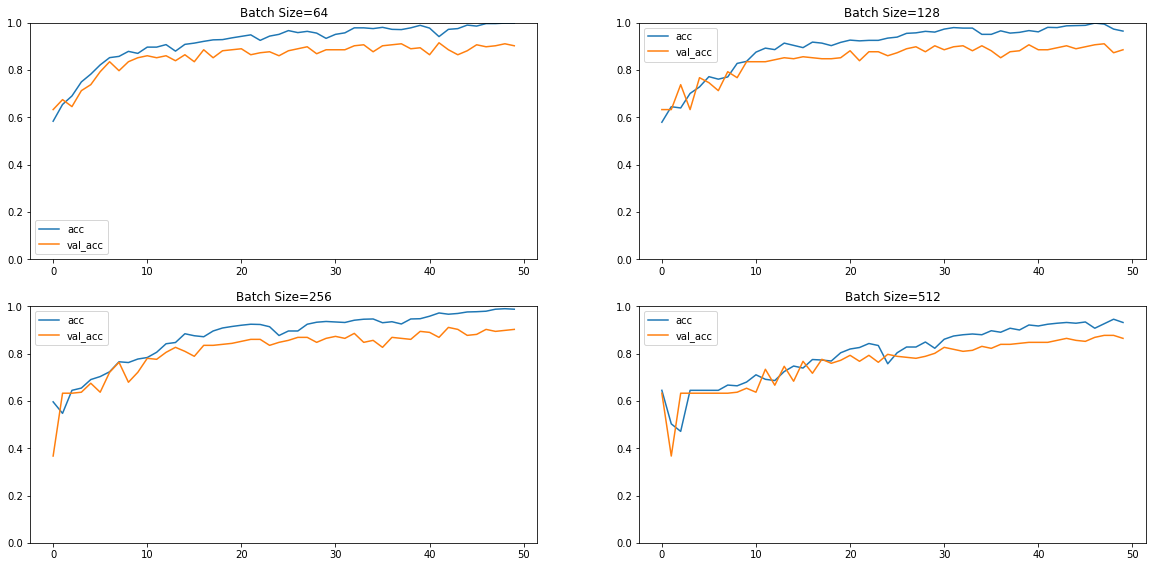

In [15]:
batch_size = [64, 128,256, 512]


plt.figure(figsize=(20, 20))
for i in range(len(batch_size)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, batch_size[i])

# show learning curves
plt.show()

# Epoch

In [16]:
def fit_second_model(x_train, y_train, x_test, y_test, ep):
    model = Sequential()
    model.add(Conv2D(96, kernel_size=(3,3), strides= 4, padding= 'same', activation= 'relu', input_shape= (224,224,3), kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))

    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=ep, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Epoch='+str(ep))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/20
15/15 [==============================] - 3s 118ms/step - loss: 0.8091 - accuracy: 0.6176 - val_loss: 0.6420 - val_accuracy: 0.6329
Epoch 2/20
15/15 [==============================] - 1s 92ms/step - loss: 0.6254 - accuracy: 0.6504 - val_loss: 0.5865 - val_accuracy: 0.6920
Epoch 3/20
15/15 [==============================] - 1s 92ms/step - loss: 0.5830 - accuracy: 0.6727 - val_loss: 0.5544 - val_accuracy: 0.7342
Epoch 4/20
15/15 [==============================] - 1s 93ms/step - loss: 0.5051 - accuracy: 0.7585 - val_loss: 0.4891 - val_accuracy: 0.7468
Epoch 5/20
15/15 [==============================] - 1s 92ms/step - loss: 0.4152 - accuracy: 0.7977 - val_loss: 0.4692 - val_accuracy: 0.7679
Epoch 6/20
15/15 [==============================] - 1s 92ms/step - loss: 0.3830 - accuracy: 0.8294 - val_loss: 0.4250 - val_accuracy: 0.7932
Epoch 7/20
15/15 [==============================] - 1s 91ms/step - loss: 0.3245 - accuracy: 0.8644 - val_loss: 0.6182 - val_accuracy: 0.7637
Epoch 8/20
1

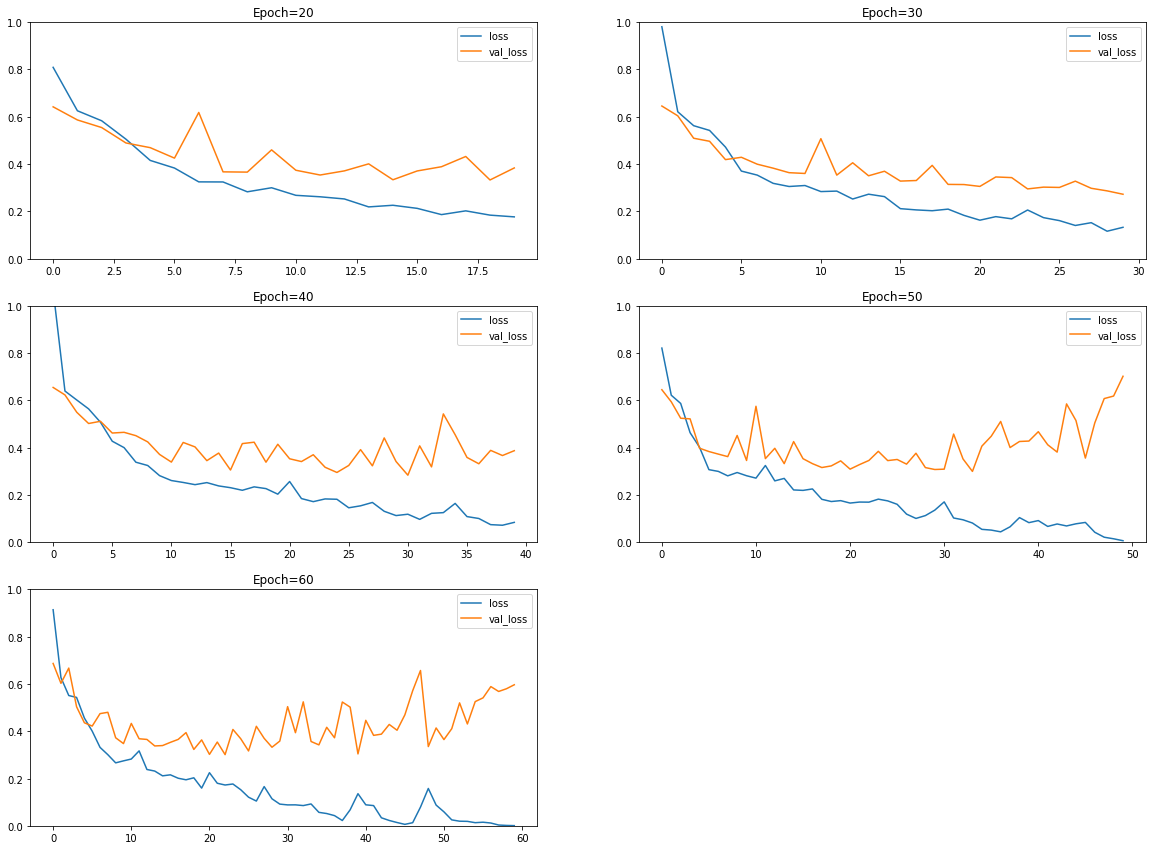

In [17]:
epoch = [20, 30, 40, 50, 60]


plt.figure(figsize=(20, 20))
for i in range(len(epoch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, epoch[i])

# show learning curves
plt.show()

In [14]:
def fit_second_model(x_train, y_train, x_test, y_test, ep):
    model = Sequential()
    model.add(Conv2D(96, kernel_size=(3,3), strides= 4, padding= 'same', activation= 'relu', input_shape= (224,224,3), kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))

    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=ep, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Epoch='+str(ep))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/20
15/15 [==============================] - 13s 192ms/step - loss: 0.8582 - accuracy: 0.6091 - val_loss: 0.6318 - val_accuracy: 0.6414
Epoch 2/20
15/15 [==============================] - 1s 91ms/step - loss: 0.6277 - accuracy: 0.6557 - val_loss: 0.6075 - val_accuracy: 0.6540
Epoch 3/20
15/15 [==============================] - 1s 91ms/step - loss: 0.5332 - accuracy: 0.7489 - val_loss: 0.6040 - val_accuracy: 0.6835
Epoch 4/20
15/15 [==============================] - 1s 92ms/step - loss: 0.4720 - accuracy: 0.7691 - val_loss: 0.5091 - val_accuracy: 0.7384
Epoch 5/20
15/15 [==============================] - 1s 90ms/step - loss: 0.3739 - accuracy: 0.8284 - val_loss: 0.4097 - val_accuracy: 0.8143
Epoch 6/20
15/15 [==============================] - 1s 91ms/step - loss: 0.3441 - accuracy: 0.8432 - val_loss: 0.4088 - val_accuracy: 0.8059
Epoch 7/20
15/15 [==============================] - 1s 91ms/step - loss: 0.3281 - accuracy: 0.8665 - val_loss: 0.3419 - val_accuracy: 0.8397
Epoch 8/20


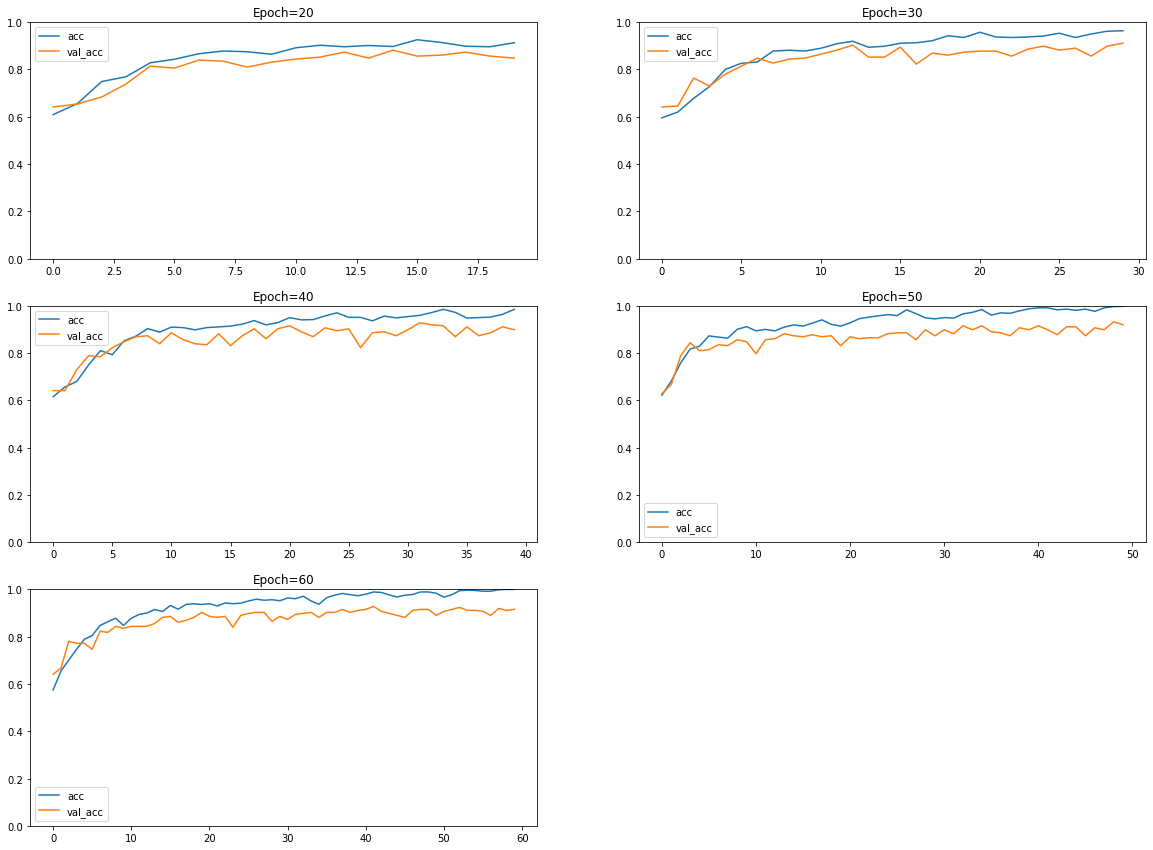

In [15]:
epoch = [20, 30, 40, 50, 60]


plt.figure(figsize=(20, 20))
for i in range(len(epoch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, epoch[i])

# show learning curves
plt.show()

# Learning Rate

In [16]:
def fit_second_model(x_train, y_train, x_test, y_test, lr):
    model = Sequential()
    model.add(Conv2D(96, kernel_size=(3,3), strides= 4, padding= 'same', activation= 'relu', input_shape= (224,224,3), kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))

    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=lr),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Learning Rate='+str(lr))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
15/15 [==============================] - 3s 124ms/step - loss: 2276594.5000 - accuracy: 0.4460 - val_loss: 19.4482 - val_accuracy: 0.3586
Epoch 2/50
15/15 [==============================] - 1s 91ms/step - loss: 56.0979 - accuracy: 0.4905 - val_loss: 1.2266 - val_accuracy: 0.6414
Epoch 3/50
15/15 [==============================] - 1s 90ms/step - loss: 0.8345 - accuracy: 0.6430 - val_loss: 0.6533 - val_accuracy: 0.6414
Epoch 4/50
15/15 [==============================] - 1s 90ms/step - loss: 0.6544 - accuracy: 0.6430 - val_loss: 0.6528 - val_accuracy: 0.6414
Epoch 5/50
15/15 [==============================] - 1s 90ms/step - loss: 0.6584 - accuracy: 0.6430 - val_loss: 0.6598 - val_accuracy: 0.6414
Epoch 6/50
15/15 [==============================] - 1s 90ms/step - loss: 0.6548 - accuracy: 0.6430 - val_loss: 0.6542 - val_accuracy: 0.6414
Epoch 7/50
15/15 [==============================] - 2s 102ms/step - loss: 0.6534 - accuracy: 0.6430 - val_loss: 0.6529 - val_accuracy: 0.6414
Epo

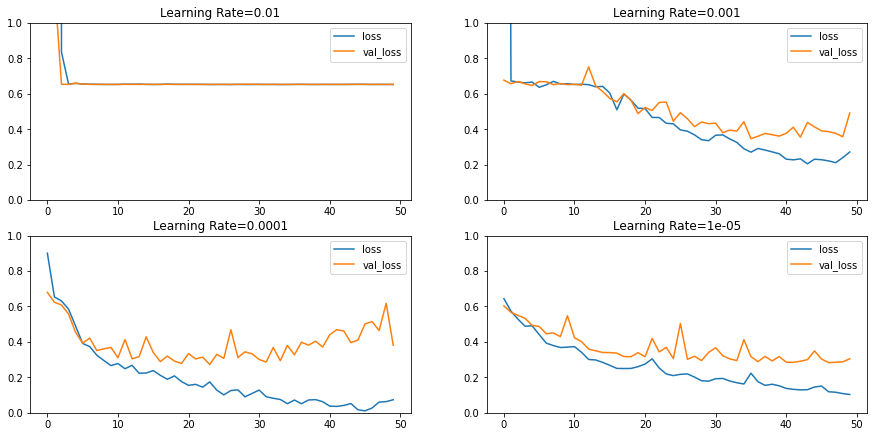

In [17]:
lr = [0.01, 0.001, 0.0001, 0.00001]


plt.figure(figsize=(15, 15))
for i in range(len(lr)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, lr[i])

# show learning curves
plt.show()

In [18]:
def fit_second_model(x_train, y_train, x_test, y_test, lr):
    model = Sequential()
    model.add(Conv2D(96, kernel_size=(3,3), strides= 4, padding= 'same', activation= 'relu', input_shape= (224,224,3), kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))

    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=lr),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Learning Rate='+str(lr))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
15/15 [==============================] - 4s 190ms/step - loss: 1107363.5000 - accuracy: 0.5106 - val_loss: 22.8955 - val_accuracy: 0.3586
Epoch 2/50
15/15 [==============================] - 1s 92ms/step - loss: 2.6344 - accuracy: 0.5540 - val_loss: 0.7759 - val_accuracy: 0.6414
Epoch 3/50
15/15 [==============================] - 1s 89ms/step - loss: 0.6672 - accuracy: 0.6430 - val_loss: 0.6530 - val_accuracy: 0.6414
Epoch 4/50
15/15 [==============================] - 1s 89ms/step - loss: 0.6539 - accuracy: 0.6430 - val_loss: 0.6616 - val_accuracy: 0.6414
Epoch 5/50
15/15 [==============================] - 1s 90ms/step - loss: 0.6572 - accuracy: 0.6430 - val_loss: 0.6527 - val_accuracy: 0.6414
Epoch 6/50
15/15 [==============================] - 1s 89ms/step - loss: 0.6562 - accuracy: 0.6430 - val_loss: 0.6532 - val_accuracy: 0.6414
Epoch 7/50
15/15 [==============================] - 1s 89ms/step - loss: 0.6546 - accuracy: 0.6430 - val_loss: 0.6540 - val_accuracy: 0.6414
Epoch

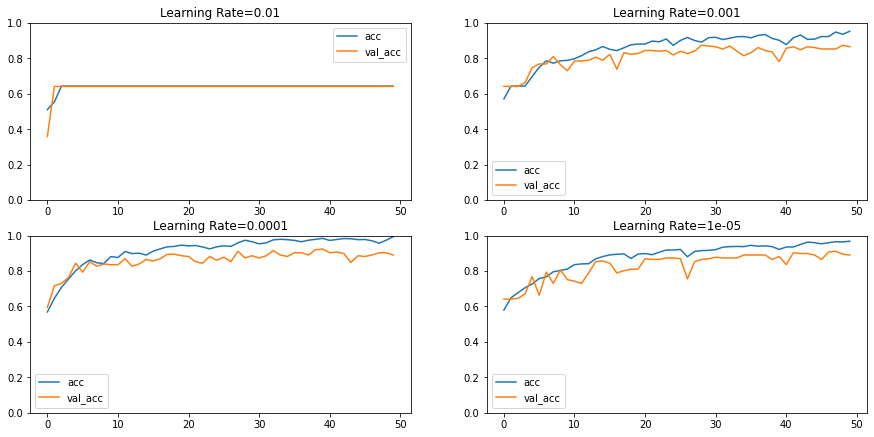

In [19]:
lr = [0.01, 0.001, 0.0001, 0.00001]


plt.figure(figsize=(15, 15))
for i in range(len(lr)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, lr[i])

# show learning curves
plt.show()

# Optimizer

In [20]:
def fit_second_model(x_train, y_train, x_test, y_test, opt):
    model = Sequential()
    model.add(Conv2D(96, kernel_size=(3,3), strides= 4, padding= 'same', activation= 'relu', input_shape= (224,224,3), kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))

    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = opt(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Optimizer='+str(opt))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
15/15 [==============================] - 2s 117ms/step - loss: 0.8494 - accuracy: 0.6282 - val_loss: 0.6653 - val_accuracy: 0.7004
Epoch 2/50
15/15 [==============================] - 1s 91ms/step - loss: 0.6615 - accuracy: 0.6419 - val_loss: 0.6411 - val_accuracy: 0.6414
Epoch 3/50
15/15 [==============================] - 1s 91ms/step - loss: 0.6345 - accuracy: 0.6398 - val_loss: 0.6557 - val_accuracy: 0.6414
Epoch 4/50
15/15 [==============================] - 1s 92ms/step - loss: 0.5816 - accuracy: 0.6981 - val_loss: 0.5718 - val_accuracy: 0.7089
Epoch 5/50
15/15 [==============================] - 1s 91ms/step - loss: 0.4966 - accuracy: 0.7680 - val_loss: 0.4302 - val_accuracy: 0.8143
Epoch 6/50
15/15 [==============================] - 1s 90ms/step - loss: 0.3944 - accuracy: 0.8178 - val_loss: 0.4064 - val_accuracy: 0.8228
Epoch 7/50
15/15 [==============================] - 2s 103ms/step - loss: 0.3618 - accuracy: 0.8496 - val_loss: 0.4007 - val_accuracy: 0.8228
Epoch 8/50


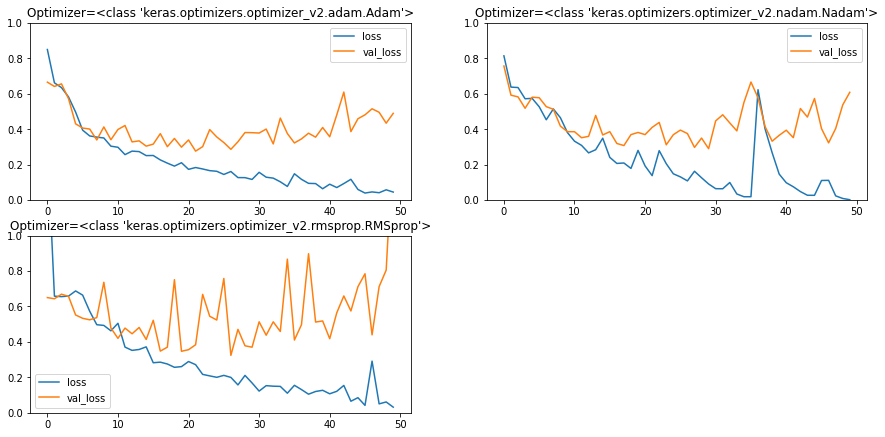

In [21]:
opt = [Adam, Nadam, RMSprop]


plt.figure(figsize=(15, 15))
for i in range(len(opt)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, opt[i])

# show learning curves
plt.show()

In [22]:
def fit_second_model(x_train, y_train, x_test, y_test, opt):
    model = Sequential()
    model.add(Conv2D(96, kernel_size=(3,3), strides= 4, padding= 'same', activation= 'relu', input_shape= (224,224,3), kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu', kernel_initializer= 'he_normal'))

    model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'same', data_format= None))

    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = opt(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Optimizer='+str(opt))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
15/15 [==============================] - 2s 117ms/step - loss: 0.9223 - accuracy: 0.5530 - val_loss: 0.6416 - val_accuracy: 0.6414
Epoch 2/50
15/15 [==============================] - 1s 92ms/step - loss: 0.6300 - accuracy: 0.6451 - val_loss: 0.6255 - val_accuracy: 0.6751
Epoch 3/50
15/15 [==============================] - 1s 93ms/step - loss: 0.5781 - accuracy: 0.6970 - val_loss: 0.7172 - val_accuracy: 0.6498
Epoch 4/50
15/15 [==============================] - 1s 92ms/step - loss: 0.5845 - accuracy: 0.7013 - val_loss: 0.5537 - val_accuracy: 0.7257
Epoch 5/50
15/15 [==============================] - 1s 93ms/step - loss: 0.4901 - accuracy: 0.7617 - val_loss: 0.5669 - val_accuracy: 0.7468
Epoch 6/50
15/15 [==============================] - 1s 92ms/step - loss: 0.4740 - accuracy: 0.7669 - val_loss: 0.4582 - val_accuracy: 0.7764
Epoch 7/50
15/15 [==============================] - 1s 92ms/step - loss: 0.3812 - accuracy: 0.8369 - val_loss: 0.4181 - val_accuracy: 0.8228
Epoch 8/50
1

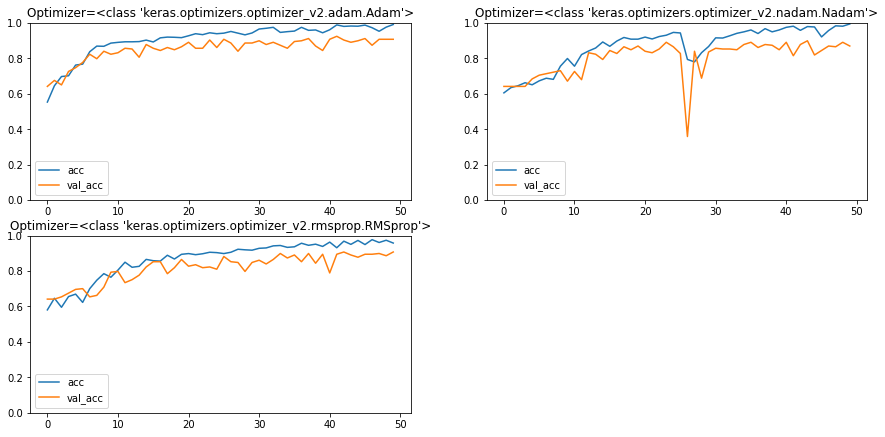

In [23]:
opt = [Adam, Nadam, RMSprop]


plt.figure(figsize=(15, 15))
for i in range(len(opt)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, opt[i])

# show learning curves
plt.show()